In [1]:
import mfd as mfd
from random import choices, seed
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 9.01
mags = mfd.sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 100000, mbin=0.001, \
                   rseed=12121);

In [7]:
Mwr = [round(m, 1) for m in mags]
b = mfd.calc_bvalue(Mwr, magbin=0.00001)
print(b)

0.9997409846140889


10.003274758555511


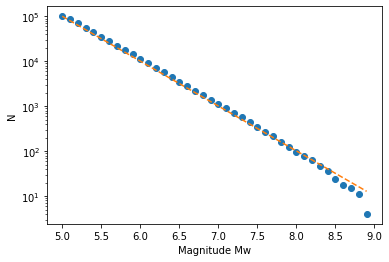

In [8]:
N, M = mfd.distr_empirical(Mwr, magbin = 0.1, doplot=True);
a = mfd.calc_avalue(b, M, N)
print(a)
pN = [10**(a-b*m) for m in M]
plt.plot(M, pN, '--')